# Processing perturbation coefficients using `sandy`

Let's start by importing the python packages `sandy` and `pandas` for data processing.

In [6]:
import sandy
import pandas as pd

Then, we import some more packages for plotting purposes.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook   # uncomment this if you are in a jupyter notebook

We define a multigroup perturbation as a series of tabulated pairs `(energy value, perturbation coefficient)`, 
where the energy values are the right bounds of the energy bins that define the perturbation coefficient as a 
step function.

In [8]:
grid   = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e5, 1e6, 1e7, 2e7] # right bounds of each energy interval
values = [   1,  1.4,  1.3,  1.2,  1.1, 0.6, 1.8, 1.9, 1.9, 1.6]
series = pd.Series(values, index=grid)
pert = sandy.Pert(series)
pert

ENERGY
(0.0, 1e-05]                1.0
(1e-05, 0.0001]             1.4
(0.0001, 0.001]             1.3
(0.001, 0.01]               1.2
(0.01, 0.1]                 1.1
(0.1, 1.0]                  0.6
(1.0, 100000.0]             1.8
(100000.0, 1000000.0]       1.9
(1000000.0, 10000000.0]     1.9
(10000000.0, 20000000.0]    1.6
dtype: float64

The `pert` variable is a `sandy.Pert` instance and it contains perturbation coefficients 
into a `pandas.Series` with a `pandas.IntervalIndex` that defines the energy bins.

For plotting and analysis purposes we are often interested in tabulated values that are not indexed by energy bins, 
but by scalar energy values.
By calling attribute `.right` the instance returns a `pandas.Series` with perturbation coefficients as `.values` and the 
right bounds of the energy bins as `.index`.

Try also `pert.left` and `pert.mid`.

In [9]:
pert.right

1.000000e-05    1.0
1.000000e-04    1.4
1.000000e-03    1.3
1.000000e-02    1.2
1.000000e-01    1.1
1.000000e+00    0.6
1.000000e+05    1.8
1.000000e+06    1.9
1.000000e+07    1.9
2.000000e+07    1.6
dtype: float64

We can resort to the outputs produced by attributes `.right` and `.left` to plot the perturbation coefficients.
*Notice that for a correct rendering of the output of `.left` 'steps-post' should be assigned to 
the drawstyle argument*.

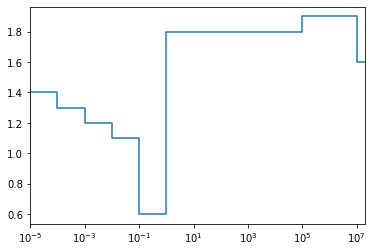

In [10]:
pert.right.plot(logx=True, drawstyle="steps")
plt.show()

Perturbation objects can also be printed to a `.csv` or text file with columns divided by a specific separator.

In [11]:
pert.right.to_csv("pert.csv", sep=",", header=False)
with open("pert.csv") as f:
    text = f.read()
print(text)

1e-05,1.0
0.0001,1.4
0.001,1.3
0.01,1.2
0.1,1.1
1.0,0.6
100000.0,1.8
1000000.0,1.9
10000000.0,1.9
20000000.0,1.6



Perturbations could even be imported into `sandy` directly from a text file.  

In [12]:
sandy.Pert.from_file("pert.csv", sep=",")

ENERGY
(0.0, 1e-05]                1.0
(1e-05, 0.0001]             1.4
(0.0001, 0.001]             1.3
(0.001, 0.01]               1.2
(0.01, 0.1]                 1.1
(0.1, 1.0]                  0.6
(1.0, 100000.0]             1.8
(100000.0, 1000000.0]       1.9
(1000000.0, 10000000.0]     1.9
(10000000.0, 20000000.0]    1.6
dtype: float64

Eventually, a common request is to reshape the perturbation coefficients according the energy structure 
of, say, a cross section to directly implement a vector-vector multiplication.
This can be done using method `.reshape` to which the new energy grid is provided.

In [13]:
new_grid = [1e6, 2e6, 5e6, 1e7, 2e7]
pert2 = pert.reshape(new_grid)
pert2

ENERGY
(0.0, 1e-05]                1.0
(1e-05, 0.0001]             1.4
(0.0001, 0.001]             1.3
(0.001, 0.01]               1.2
(0.01, 0.1]                 1.1
(0.1, 1.0]                  0.6
(1.0, 100000.0]             1.8
(100000.0, 1000000.0]       1.9
(1000000.0, 2000000.0]      1.9
(2000000.0, 5000000.0]      1.9
(5000000.0, 10000000.0]     1.9
(10000000.0, 20000000.0]    1.6
dtype: float64

The reshaped `pert2` objects contains the perturbation coefficients defined over a union between 
the original and the new energy grids.

Of course the two plots overlap as the information does not change.

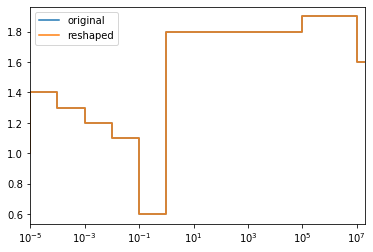

In [14]:
pert.right.plot(logx=True, drawstyle="steps", label="original")
pert2.right.plot(logx=True, drawstyle="steps", label="reshaped")
plt.legend(loc="best")
plt.show()